# Assignment 7 - Data Visualization 

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Matplotlib

In [91]:
import os

# Directory where your data files are located
data_dir = 'ddf--datapoints--population--by--country--age--gender--year'
data = {}

# Loop through each file in the directory
for file in os.listdir(data_dir):
    # Only process files that end with .csv
    if file.endswith('.csv'):
        # Look for "country-" in the filename and split from that point
        if "country-" in file:
            # Split at "country-" and take the part after it, then split by '--' to isolate the country name
            country_part = file.split("country-")[1].split('--')[0]
            
            # Read the CSV file into a dataframe
            df = pd.read_csv(os.path.join(data_dir, file))
            
            # Store the dataframe in the dictionary with the extracted country name as the key
            data[country_part] = df
        else:
            print(f"Filename does not contain 'country-': {file}")


In [96]:
# List of selected country names
selected_countries = ['aus', 'usa', 'can', 'jpn', 'vnm']  # Replace with actual country names in the `data` dictionary

# Retrieve the dataframes for the selected countries
selected_dataframes = [data[country] for country in selected_countries if country in data]

# Combine the selected dataframes into one
combined_data = pd.concat(selected_dataframes, axis=0, ignore_index=True)


In [100]:
# Group by 'year' and 'country' and sum the population
yearly_population = combined_data.groupby(['year','country'])['population'].sum().reset_index()
print(f'Total population by year:\n{yearly_population}')

country_population = combined_data.groupby(['country'])['population'].sum().reset_index()
print(f'Total population by country:{country} {country_population}')

Total population by year:
     year country  population
0    1950     aus     8176754
1    1950     can    13741750
2    1950     jpn    86443276
3    1950     usa   154202691
4    1950     vnm    25100744
..    ...     ...         ...
750  2100     aus    43143684
751  2100     can    53612234
752  2100     jpn    76845993
753  2100     usa   421278894
754  2100     vnm    91705109

[755 rows x 3 columns]
Total population by country:vnm   country   population
0     aus   3916732701
1     can   5616216536
2     jpn  16082329721
3     usa  48370092406
4     vnm  12531846634


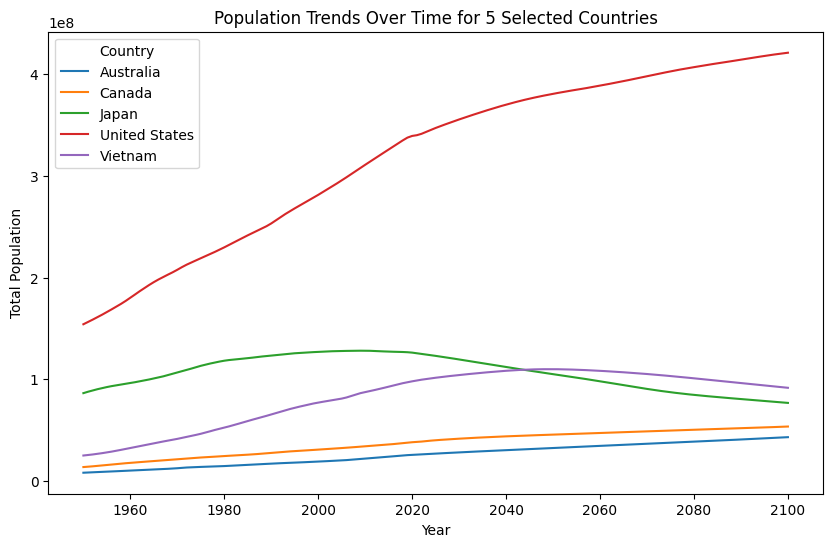

In [101]:
# Define a dictionary mapping country codes to full country names
country_names = {
    'aus': 'Australia',
    'usa': 'United States',
    'can': 'Canada',
    'jpn': 'Japan',
    'vnm': 'Vietnam'
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Loop through each country code to plot its population data over time
for country in yearly_population['country'].unique():
    # Filter data for each country
    country_data = yearly_population[yearly_population['country'] == country]
    
    # Get the full country name from the dictionary
    full_name = country_names.get(country, country)  # Defaults to code if name is missing
    
    # Plot the year vs. population for this country and label with full country name
    plt.plot(country_data['year'], country_data['population'], label=full_name)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Population Trends Over Time for 5 Selected Countries')

# Add legend with full country names
plt.legend(title='Country')
plt.grid(False)

# Show the plot
plt.show()


# Brief description: US has the fastest rate of increasing population

In [102]:
print(yearly_population.columns)

Index(['year', 'country', 'population'], dtype='object')


In [70]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152510 entries, 0 to 152509
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   country     152510 non-null  object
 1   age         152510 non-null  int64 
 2   gender      152510 non-null  int64 
 3   year        152510 non-null  int64 
 4   population  152510 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 5.8+ MB


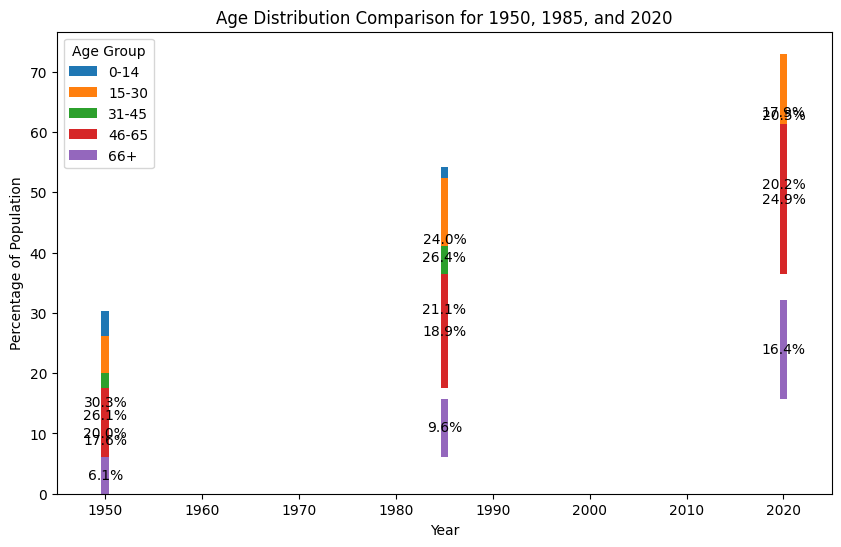

In [103]:
import matplotlib.pyplot as plt

# Define the age group categories using integer ranges
age_groups = {
    '0-14': (0, 14),
    '15-30': (15, 30),
    '31-45': (31, 45),
    '46-65': (46, 65),
    '66+': (66, 120)  # 120 as a practical upper limit for age
}

# Define the years to compare
comparison_years = [1950, 1985, 2020]

# Initialize a list to store the age distribution data
age_distribution = []

# Loop through each year and each age group to calculate population totals and percentages
for year in comparison_years:
    # Total population for the given year
    total_population_year = combined_data[combined_data['year'] == year]['population'].sum()
    
    for group_name, (age_min, age_max) in age_groups.items():
        # Filter data by year and age range, then sum population
        group_population = combined_data[
            (combined_data['year'] == year) &
            (combined_data['age'] >= age_min) &
            (combined_data['age'] <= age_max)
        ]['population'].sum()
        
        # Calculate percentage of total population
        percentage = (group_population / total_population_year) * 100
        
        # Append the result as a dictionary
        age_distribution.append({
            'year': year,
            'age_group': group_name,
            'population': group_population,
            'percentage': percentage
        })

# Convert the list to a DataFrame
age_distribution_df = pd.DataFrame(age_distribution)

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 1.5

# Prepare the stacked bar segments
for age_group in age_groups.keys():
    # Filter the DataFrame for the specific age group
    subset = age_distribution_df[age_distribution_df['age_group'] == age_group]
    
    # Calculate the bottom position for stacking
    bottom = subset['percentage'].cumsum() - subset['percentage']
    
    # Plot each age group as a stacked bar segment
    ax.bar(subset['year'], subset['percentage'], label=age_group, bottom=bottom)

    # Add text annotations for each age group percentage
    for i, (year, percent) in enumerate(zip(subset['year'], subset['percentage'])):
        ax.text(year, bottom.iloc[i] + percent / 2, f"{percent:.1f}%", ha='center', va='center', color='black')


# Add labels and title
plt.cm.Set2
ax.set_xlim(1945, 2025)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Population')
ax.set_title('Age Distribution Comparison for 1950, 1985, and 2020')
ax.legend(title="Age Group")
plt.show()


# Brief description: the age group of 46-65 is the largest group across the years

# Part 2: Seaborn

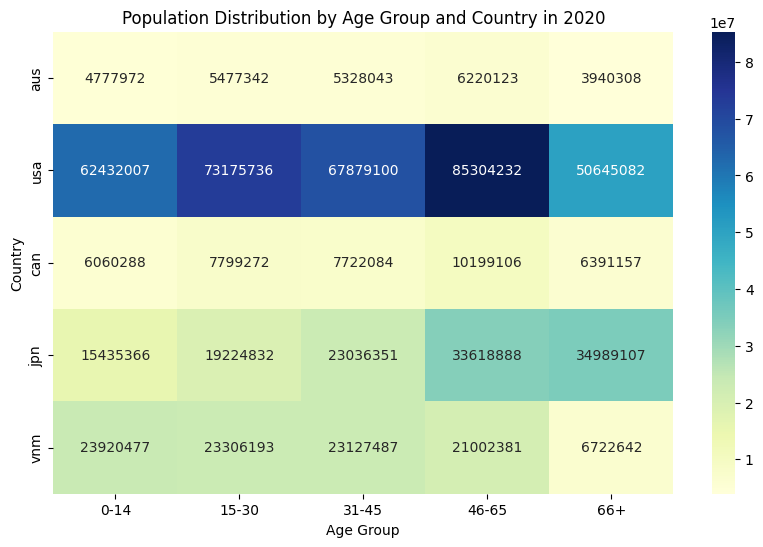

In [104]:

# Define age groups and the specific year
age_groups = {'0-14': (0, 14), '15-30': (15, 30), '31-45': (31, 45), '46-65': (46, 65), '66+': (66, 120)}
selected_countries = ['aus', 'usa', 'can', 'jpn', 'vnm']
selected_year = 2020

# Aggregate population data
heatmap_data = []
for country in selected_countries:
    country_data = combined_data[(combined_data['year'] == selected_year) & (combined_data['country'] == country)]
    age_group_totals = []
    for group, (age_min, age_max) in age_groups.items():
        group_population = country_data[(country_data['age'] >= age_min) & (country_data['age'] <= age_max)]['population'].sum()
        age_group_totals.append(group_population)
    heatmap_data.append(age_group_totals)

# Convert to DataFrame for the heatmap
heatmap_df = pd.DataFrame(heatmap_data, index=selected_countries, columns=age_groups.keys())

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True)
plt.title(f'Population Distribution by Age Group and Country in {selected_year}')
plt.xlabel('Age Group')
plt.ylabel('Country')
plt.show()


# Brief description: US has the largest population for all age groups

Unique values in 'gender': [1 2]


/var/folders/0c/lpwqndbd1wn2y0_gz1l1x3vr0000gn/T/ipykernel_40916/3271146721.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['gender'] = filtered_data['gender'].map({1: 'Male', 2: 'Female'}).astype('category')


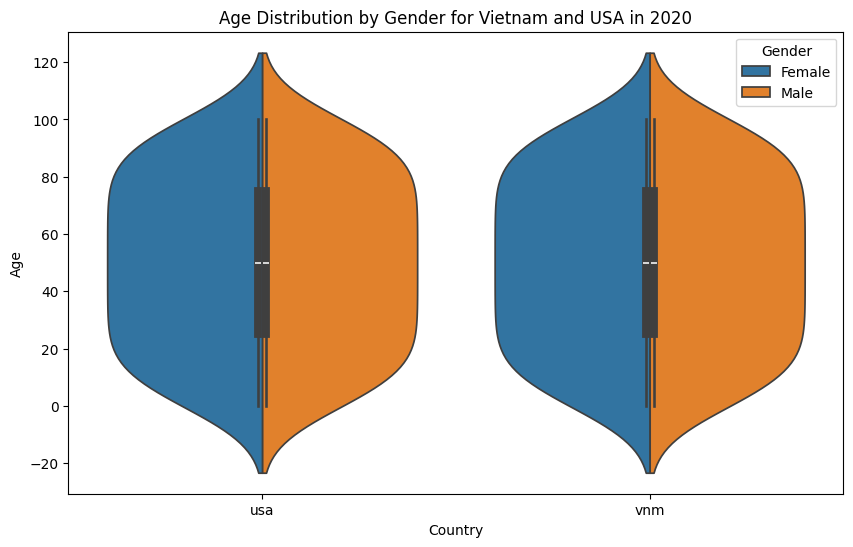

In [105]:

# Filter data for two countries and the year 2020
selected_countries = ['vnm', 'usa']
filtered_data = combined_data[(combined_data['year'] == 2020) & (combined_data['country'].isin(selected_countries))]

# Convert `gender` to categorical if necessary
print("Unique values in 'gender':", filtered_data['gender'].unique())
filtered_data['gender'] = filtered_data['gender'].map({1: 'Male', 2: 'Female'}).astype('category')

# Plot side-by-side violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(x='country', y='age', hue='gender', data=filtered_data, split=True)
plt.xlabel('Country')
plt.ylabel('Age')
plt.title('Age Distribution by Gender for Vietnam and USA in 2020')
plt.legend(title='Gender')
plt.show()

# Brief description: Gender distributions look the same for Vietnam and US

/var/folders/0c/lpwqndbd1wn2y0_gz1l1x3vr0000gn/T/ipykernel_40916/3787995407.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['country'] = filtered_data['country'].astype('category')


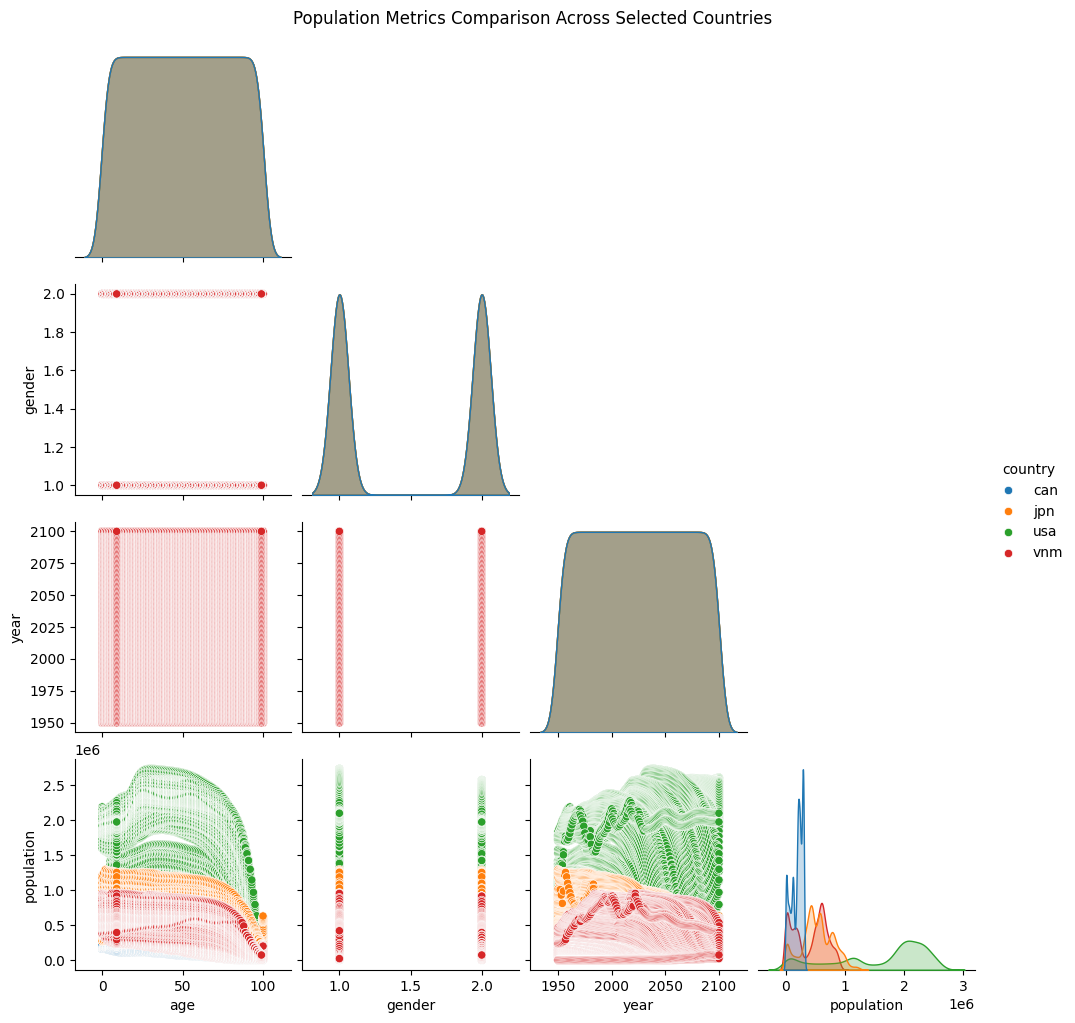

In [108]:
# Select four countries of interest
selected_countries = ['usa','can', 'jpn', 'vnm']
filtered_data = combined_data[combined_data['country'].isin(selected_countries)]

# Convert `country` to a categorical data type if needed
filtered_data['country'] = filtered_data['country'].astype('category')

# Create the pairplot with `hue` for country
sns.pairplot(filtered_data, hue='country', diag_kind='kde', corner=True, height=2.5)
plt.suptitle('Population Metrics Comparison Across Selected Countries', y=1.02)
plt.show()

# I am not familiar with this type of graph and don't know how to intepret it